In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#importing manager csv
female_manager = pd.read_csv('Data/female_manager.csv')
female_manager.head()
#removing additional years
female_manager_2019=female_manager[["new_code", "year_2019"]]
female_manager_2019.head()
#renaming 2019

female_manager_2019_final=female_manager_2019.rename(columns = {
    "year_2019" :"manager"
})
female_manager_2019_final.head()

,new_code,manager
0,AW,0.0
1,AF,0.0
2,AO,0.0
3,AL,18.1
4,AD,0.0


In [2]:
#importing parliament
female_labor = pd.read_csv('Data/labor_participation.csv')
female_labor.head()
#reducing columns
female_labor_2019=female_labor[["new_code", "year_2019"]]
female_labor_2019.head()
#renaming 2019
female_labor_2019_final=female_labor_2019.rename(columns = {
    "year_2019" :"labor"
})
female_labor_2019_final.head()

,new_code,labor
0,AW,0.00
1,AF,21.59
2,AO,76.14
3,AL,46.71
4,AD,0.00


In [3]:
manager_regression=pd.merge(female_labor_2019_final, female_manager_2019_final, how='inner', on=["new_code", "new_code"])

In [4]:

manager_regression_final=manager_regression[(manager_regression["manager"]>0)]
manager_regression_final

,new_code,labor,manager
3,AL,46.71,18.1
12,AZ,63.41,16.5
18,BG,49.24,28.8
20,BA,35.39,16.6
40,CY,57.83,8.2
41,CZ,52.94,16.1
51,EE,57.10,22.5
59,GE,57.42,16.5
72,HR,45.45,27.0
74,HU,48.47,22.1


In [5]:
X = manager_regression_final[['labor']]
y = manager_regression_final["manager"].values.reshape(-1, 1)


In [6]:
from sklearn.linear_model import LinearRegression




In [7]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [8]:
# from sklearn.preprocessing import StandardScaler
# ### BEGIN SOLUTION
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [9]:
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

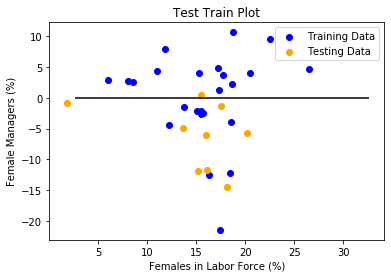

In [12]:
predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Test Train Plot")
plt.ylabel('Female Managers (%)')
plt.xlabel('Females in Labor Force (%)')
plt.savefig('static/images/labor_manager_machine.svg')

In [13]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 64.65687931852622, R2: 0.06777088669501208
